In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime as dt
from scipy import stats
from sklearn import preprocessing

In [2]:
df1=pd.read_csv('drugsComTrain_raw.csv')
df2=pd.read_csv('drugsComTest_raw.csv')

df=pd.concat([df1,df2])
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

Text(0.5, 0, 'rating')

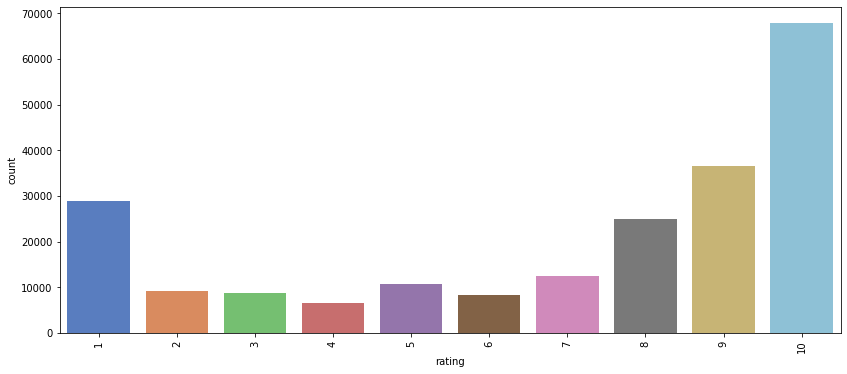

In [5]:
plt.figure(figsize=(14,6))
df2_top20=df.rating.value_counts()[:20].reset_index(name='count')
df2_top20
sns.barplot(x='index',y='count',data=df2_top20,palette='muted')
plt.xticks(rotation=90)
plt.xlabel('rating')

(5.5, 9.5)

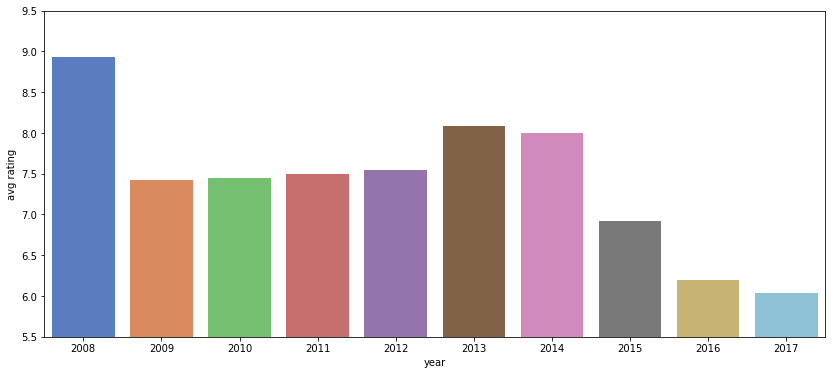

In [6]:
#dfry=df.groupby(['year']).size().reset_index(name='count')
plt.figure(figsize=(14,6))
dfry=df.groupby(['year'])['rating'].mean().reset_index(name='count')
s1=sns.barplot(x='year',y='count',data=dfry,palette='muted')

plt.xlabel('year')
plt.ylabel('avg rating')
s1.set_ylim([5.5,9.5])

(6.7, 7.25)

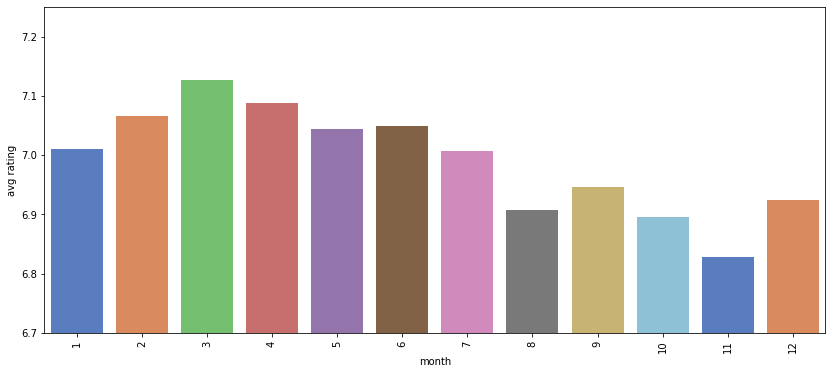

In [7]:
plt.figure(figsize=(14,6))
dfrmm=df.groupby(['month'])['rating'].mean().reset_index(name='count')
s2=sns.barplot(x='month',y='count',data=dfrmm,palette='muted')

plt.xlabel('month')
plt.ylabel('avg rating')
plt.xticks(rotation=90)
s2.set_ylim([6.7,7.25])

(6.7, 7.2)

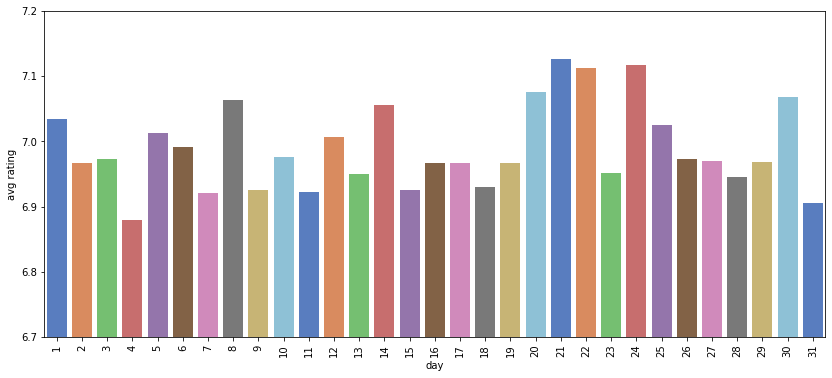

In [8]:
plt.figure(figsize=(14,6))
dfrmd=df.groupby(['day'])['rating'].mean().reset_index(name='count')
s3=sns.barplot(x='day',y='count',data=dfrmd,palette='muted')

plt.xlabel('day')
plt.ylabel('avg rating')
plt.xticks(rotation=90)
s3.set_ylim([6.7,7.2])

In [9]:
df['condition'].nunique()

916

In [10]:
df.loc[df['rating']<=4,'label']=-1
df.loc[(df['rating']>4) & (df['rating']<7),'label']=0
df.loc[df['rating']>=7,'label']=1

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(df['review'], df['label'], test_size=0.25, random_state=0)


In [13]:
X_train.shape

(161297,)

In [14]:
X_test.shape

(53766,)

In [15]:
df['drugName'].nunique()

3671

In [16]:
#100.*df.A.eq('Used').sum()/df.shape[0]
100.*(df['label'] == 0).sum()/len(df.index)

8.92064185843218

Text(0, 0.5, 'accuracy %')

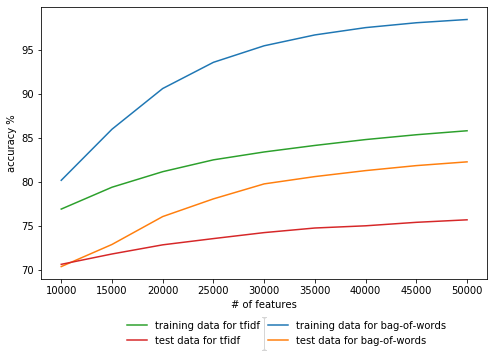

In [55]:
#logistic regression for (1,2)

train_acc_cv1=[80.2113149939237, 85.99837295489469, 90.6123514819167, 93.58221097351532, 95.45632589110849, 96.68665320839234, 97.51524099350186, 98.06562415258068, 98.43522452218104]
test_acc_cv1=[70.43386562217535, 72.94064477252185, 76.10123531184092, 78.10786381440192, 79.80415787887918, 80.63272069900572, 81.3106357336547, 81.87707140705032, 82.30189816209702]
train_acc_tf1=[76.95119869032912, 79.42691855735335, 81.18854640593771, 82.53035644339992, 83.42322255365734, 84.16242329285808, 84.82830656743701, 85.37467233119406, 85.82562495605974]
test_acc_tf1=[70.68996685748719, 71.86200662850256, 72.89846339258813, 73.60650798433262, 74.28442301898161, 74.80566435673396, 75.0557396806267, 75.45043687857789, 75.73365471527569]
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv1,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv1,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf1, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf1, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv1,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv1,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf1, palette='dark',label="training data for tfidf")
sns.lineplot(n,test_acc_tf1, palette='dark',label="test data for tfidf")


#box = plt.get_position()
#plt.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

#plt.legend(loc="upper left",prop={"size":8})
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [12]:
from statistics import mean

print(mean(train_acc_cv1))
print(mean(test_acc_cv1))
print(mean(train_acc_tf1))
print(mean(test_acc_tf1))

92.95147990800164
78.16778815573633
82.63458553313626
73.82076261256738


Text(0, 0.5, 'accuracy %')

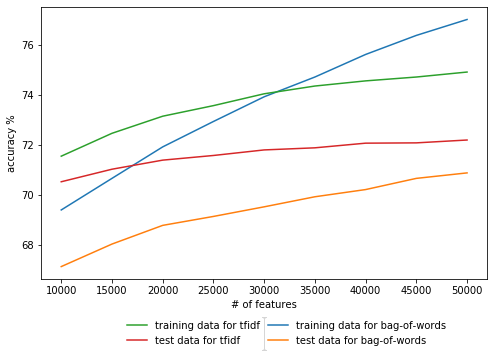

In [56]:
#  multi nb

train_acc_cv2=[69.3954824389607, 70.66297066297066, 71.92644149165889, 72.94585555455122, 73.93714785019134, 74.7305834262356, 75.63650607128868, 76.40081553125032, 77.03958138740748]
test_acc_cv2=[67.12262729737873, 68.02651401024406, 68.77673998192226, 69.13528171135884, 69.52094004218138, 69.92467610726122, 70.21391985537812, 70.66285025610124, 70.88279602289846]
train_acc_tf2=[71.55382807556721, 72.47180290658551, 73.15777315777315, 73.5826127130475, 74.05766970984362, 74.36901784727871, 74.57591370634849, 74.7305834262356, 74.93044884349233]
test_acc_tf2=[70.52726724917143, 71.03043085266647, 71.39499849352214, 71.5818017475143, 71.8047604700211, 71.88912322988853, 72.07592648388069, 72.0879783067189, 72.20247062368183]
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv1,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv1,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf1, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf1, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv2,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv2,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf2, palette='dark',label="training data for tfidf")
sns.lineplot(n,test_acc_tf2, palette='dark',label="test data for tfidf")


#box = plt.get_position()
#plt.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

#plt.legend(loc="upper left",prop={"size":8})
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [13]:
print(mean(train_acc_cv2))
print(mean(test_acc_cv2))
print(mean(train_acc_tf2))
print(mean(test_acc_tf2))

73.63059826827943
69.36292725385826
73.71440559846357
71.62163971745171


In [14]:
# rf for n=10
test_acc_cv3=[80.87677011147936, 81.18107863814402, 80.94908104850859, 81.53058150045194, 81.08767701114795, 81.5396203675806, 80.90388671286533, 80.92497740283218, 81.37089484784573]
test_acc_tf3=[81.08165109972883, 81.05754745405243, 80.92799035854173, 80.93100331425129, 81.31364868936427, 81.16300090388671, 81.00632720699006, 81.17505272672491, 81.36486893642663]

In [15]:
# rf for n=50
test_acc_cv4=[84.70924977402832, 84.98644169930702, 85.05272672491715, 85.10093401626996, 85.01054534498343, 84.99548056643567, 85.0376619463694, 85.18830973184694, 85.01355830069298]
test_acc_tf4=[84.67610726122325, 85.0557396806267, 84.73335341970473, 85.16721904188009, 84.81771617957216, 84.98041578788792, 85.0798433263031, 85.09189514914131, 85.18228382042784]

In [16]:
# rf for n=100
test_acc_cv5=[85.4986441699307, 85.41126845435372, 85.52274781560712, 85.45646278999699, 85.4986441699307, 85.5347996384453, 85.70955106959927, 85.52274781560712, 85.50768303705935]
test_acc_tf5=[85.3389575173245, 85.39017776438686, 85.22446520036155, 85.40825549864417, 85.53781259415486, 85.66736968966556, 85.65531786682736, 85.68846037963242, 85.62518830973185]

Text(0, 0.5, 'accuracy %')

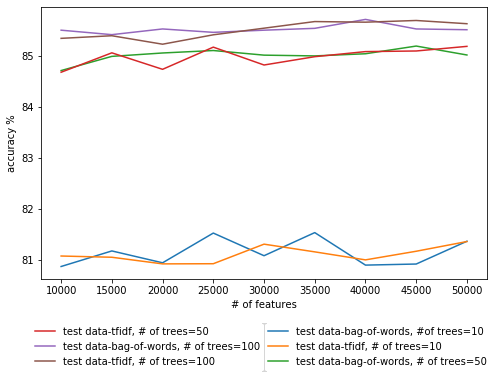

In [57]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv1,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv1,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf1, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf1, "-c",label="test data for tdif")

sns.lineplot(n,test_acc_cv3,palette='dark',label="test data-bag-of-words, #of trees=10")
sns.lineplot(n,test_acc_tf3,palette='dark',label="test data-tfidf, # of trees=10")
sns.lineplot(n,test_acc_cv4, palette='dark',label="test data-bag-of-words, # of trees=50")
sns.lineplot(n,test_acc_tf4, palette='dark',label="test data-tfidf, # of trees=50")
sns.lineplot(n,test_acc_cv5, palette='dark',label="test data-bag-of-words, # of trees=100")
sns.lineplot(n,test_acc_tf5, palette='dark',label="test data-tfidf, # of trees=100")


#box = plt.get_position()
#plt.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

#plt.legend(loc="upper left",prop={"size":8})
plt.legend(bbox_to_anchor=(0.5,-0.25), loc='center', borderaxespad=0.,ncol=2, mode="expand")
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [18]:
#tra rf n=10

train_acc_cv3=[99.36926893448631, 99.35119065553847, 99.37328632980807, 99.35420370202979, 99.3742906786385, 99.3883515622646, 99.3572167485211, 99.3602297950124, 99.3572167485211]
train_acc_tf3=[99.40944288770376, 99.36223849267327, 99.41245593419507, 99.39136460875592, 99.3602297950124, 99.37328632980807, 99.36926893448631, 99.35219500436891, 99.35219500436891]
#tra rf n=50
train_acc_cv4=[99.92366948888687, 99.92065644239557, 99.92366948888687, 99.92366948888687, 99.92366948888687, 99.92567818654776, 99.92567818654776, 99.921660791226, 99.92668253537819]
train_acc_tf4=[99.921660791226, 99.921660791226, 99.92266514005644, 99.92467383771732, 99.92467383771732, 99.92567818654776, 99.92567818654776, 99.92467383771732, 99.92668253537819]

#tra rf n=100
train_acc_cv5=[99.921660791226, 99.92366948888687, 99.92567818654776, 99.92567818654776, 99.92567818654776, 99.92668253537819, 99.92668253537819, 99.92467383771732, 99.92869123303906]
train_acc_tf5=[99.92467383771732, 99.92366948888687, 99.92567818654776, 99.92467383771732, 99.92467383771732, 99.92567818654776, 99.92668253537819, 99.92668253537819, 99.92869123303906]

In [49]:
print(mean(train_acc_cv3))
print(mean(train_acc_tf3))
print(mean(train_acc_cv4))
print(mean(train_acc_tf4))
print(mean(train_acc_cv5))
print(mean(train_acc_tf5))

print(mean(test_acc_cv3))
print(mean(test_acc_tf3))
print(mean(test_acc_cv4))
print(mean(test_acc_tf4))
print(mean(test_acc_cv5))
print(mean(test_acc_tf5))

99.3650283505356
99.3758529990414
99.92389267751587
99.92422746045935
99.92545499791876
99.92567818654776
81.15161862676175
81.11345452110743
85.01054534498343
84.9760637407519
85.51806099561448
85.50400053563656


Text(0, 0.5, 'accuracy %')

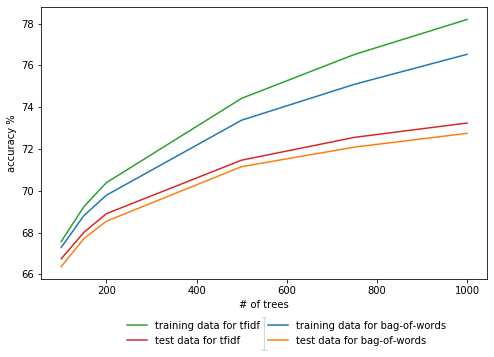

In [58]:
# gb
train_acc_cv6=[67.28735424387598, 68.80392097783403, 69.78316108750892, 73.37370815631685, 75.09014030753161,76.52635913505479]
test_acc_cv6=[66.36938836999096, 67.70412774932208, 68.53871648086773, 71.15094908104851, 72.08496535100934,72.74480265140102]
train_acc_tf6=[67.57058061405887, 69.23177357959966, 70.38275733927908, 74.41923528880051, 76.51731999558086,78.19257384474776]
test_acc_tf6=[66.74600783368484, 67.99939740885809, 68.90027116601387, 71.46128351913227, 72.55197348598975,73.2389273877674]

plt.figure(figsize=(8,5))
r=[100,150,200,500,750,1000]
sns.lineplot(r,train_acc_cv6,palette='dark',label="training data for bag-of-words")
sns.lineplot(r,test_acc_cv6,palette='dark',label="test data for bag-of-words")
sns.lineplot(r,train_acc_tf6, palette='dark',label="training data for tfidf")
sns.lineplot(r,test_acc_tf6, palette='dark',label="test data for tfidf")

#plt.legend(loc="upper left",prop={"size":8})
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")

#plt.title("line chart of e")
plt.xlabel("# of trees")
plt.ylabel("accuracy %")

In [54]:
print(mean(train_acc_cv6))
print(mean(test_acc_cv6))
print(mean(train_acc_tf6))
print(mean(test_acc_tf6))

71.81077398468703
69.76549161393994
72.71904011034445
70.1496434669077


In [29]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,1.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,1.0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,1.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,1.0


In [7]:
df.loc[df['rating']<=4,'label']=-1
df.loc[(df['rating']>4) & (df['rating']<=7),'label']=0
df.loc[df['rating']>7,'label']=1

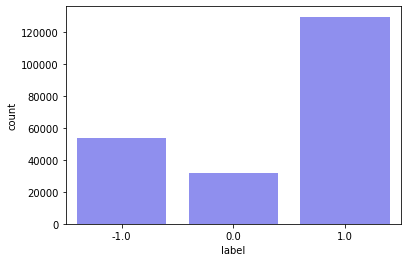

In [8]:
fr=df.groupby(['label']).size().reset_index(name='count')
sns.barplot(x=fr['label'],y=fr['count'],color='blue',alpha=0.5)


[Text(0.5, 0, 'coefficient')]

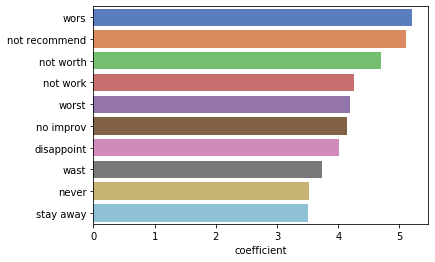

In [25]:
# lr words for neg class
w1=['wors','not recommend','not worth','not work','worst','no improv','disappoint','wast','never','stay away']
n1=[5.2110268016863195,5.1155589885466854,4.692056820451777,4.262056675120906,4.200395031669408,4.1371212981655185,4.01302779124969,3.7297495847384563,3.5198096345849135,3.50500849105063]

s1=sns.barplot(x=n1, y=w1,palette='muted')
s1.set(xlabel='coefficient')

[Text(0.5, 0, 'coefficient')]

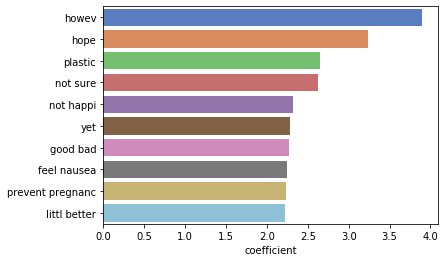

In [26]:
# lr words for neutral class
w2=['howev','hope','plastic','not sure','not happi','yet','good bad','feel nausea','prevent pregnanc','littl better']
n2=[3.899048257866621,3.2421424367722262,2.6442485684040054,2.6191914600927193,2.3244445077978457,2.2868979496472663,2.2732323625722577,2.2403302181277804,2.238229386727537,2.217130329392793]

s2=sns.barplot(x=n2, y=w2,palette='muted')
s2.set(xlabel='coefficient')

[Text(0.5, 0, 'coefficient')]

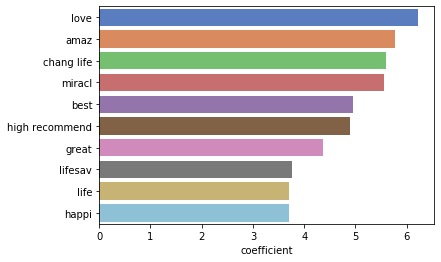

In [27]:
# lr words for positive class
w3=['love','amaz','chang life','miracl','best','high recommend','great','lifesav','life','happi']
n3=[6.220806274431284,5.780368386285489,5.587480552902525,5.551102661316655,4.955129030039039,4.8896976408780075,4.366983369881906,3.770939394042177,3.7066083404429406,3.6996855442510705]

s3=sns.barplot(x=n3, y=w3,palette='muted')
s3.set(xlabel='coefficient')

[Text(0.5, 0, 'feature importance')]

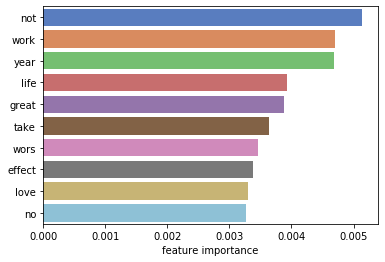

In [28]:
# rf most imp word features
w4=['not','work','year','life','great','take','wors','effect','love','no']
n4=[0.0051341338967589275,0.004693994618873936,0.004685443668120152,0.003926414712394104,0.0038813031830783272,0.0036382413017411624,0.003467443682049926,0.003378534432052155,0.0032933135959713777,0.00327336178322055]

s4=sns.barplot(x=n4, y=w4,palette='muted')
s4.set(xlabel='feature importance')

[Text(0.5, 0, 'feature importance')]

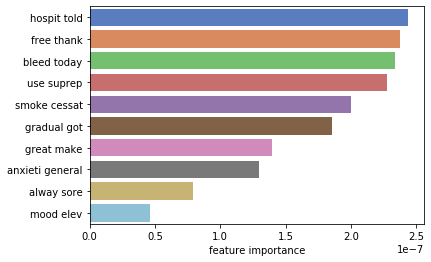

In [38]:
# rf least imp word features
w5=['hospit told','free thank','bleed today','use suprep','smoke cessat','gradual got','great make','anxieti general','alway sore','mood elev']
n5=[2.4392657486838257e-07,2.372894944453935e-07,2.3397205986899408e-07,2.272048577945738e-07,2.001359164182398e-07,1.8539361132473305e-07,1.3982580876330505e-07,1.2936583025949983e-07,7.921343455014906e-08,4.6258952369816486e-08]

s5=sns.barplot(x=n5, y=w5,palette='muted')
s5.set(xlabel='feature importance')

In [41]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,1.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,1.0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,1.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,1.0


In [42]:
sampled_review_p = df[df['label'] == 1.0].sample(n = 60000, random_state = 0)
review_0=df[df['label'] == 0.0]
review_1=df[df['label'] == -1.0]
final_df=pd.concat([sampled_review_p,review_0,review_1])


In [43]:
X_train, X_test, y_train, y_test=train_test_split(final_df['review'], final_df['label'], test_size=0.25, random_state=0)


In [44]:
X_train.shape

(108978,)

In [45]:
X_test.shape

(36326,)

In [50]:
100.*(final_df['label'] == 1.0).sum()/len(final_df.index)

41.29273798381325

In [51]:
100.*(final_df['label'] == -1.0).sum()/len(final_df.index)

36.868909321147385

In [52]:
100.*(final_df['label'] == 0.0).sum()/len(final_df.index)

21.838352695039365

In [59]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,1.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,1.0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,1.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,1.0


In [64]:
#df11=df[(df['condition']=='Depression') | (df['condition']=='Anxiety')]

In [74]:
#df11

In [75]:
#df = df[df['Animal_A'] == df['Animal_B']].groupby(['id_A', 'id_B'])['Animal_A'].count().reset_index()
l1=df[df['condition']=='Depression']
l2=df[df['condition']=='Anxiety']

In [69]:
l1=l1['drugName'].unique()

In [72]:
l2=l2['drugName'].unique()

In [73]:
set1=set(l1)
set2=set(l2)
len(set1.intersection(set2))

33

In [84]:
l1=df[df['condition']=='Pain']
l2=df[df['condition']=='Acne']

In [85]:
l1=l1['drugName'].unique()
l2=l2['drugName'].unique()
set1=set(l1)
set2=set(l2)
len(set1.intersection(set2))

0